In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

names = sorted(mcolors.TABLEAU_COLORS, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))

def plot_dist(
    title,
    quantile,
    shift=0,
    cut_off=15,
):
    quantile_max = max(quantile)
    quantile = [q/quantile_max for q in quantile]
    quantile.insert(0, -1.5)
    quantile.append(1.5)
    
    plt_data = [
        (quantile[i] + quantile[i+1])/2
        for i in range(len(quantile)-1)
    ]
    plt_x = [
        (plt_data[i] + plt_data[i+1])/2
        for i in range(len(plt_data)-1)
    ]
    plt_w = [
        plt_data[i+1] - plt_data[i]
        for i in range(len(plt_data)-1)
    ]
    plt_y = [min(cut_off, abs(1/w)) for w in plt_w]
    plt_y = [y/max(plt_y) for y in plt_y]
    center = len(plt_x) // 2
    
    
    plt.figure(dpi=600, figsize=[10,2])
    plt.bar(plt_x, plt_y, plt_w, color=[names[-abs(i-center+shift)-1] for i in range(len(plt_x))] )

    plt.title(f'Quantile Distribution of {title}')
    plt.xlabel('Normalized Weight')
    plt.ylabel('Density')

    plt.show()

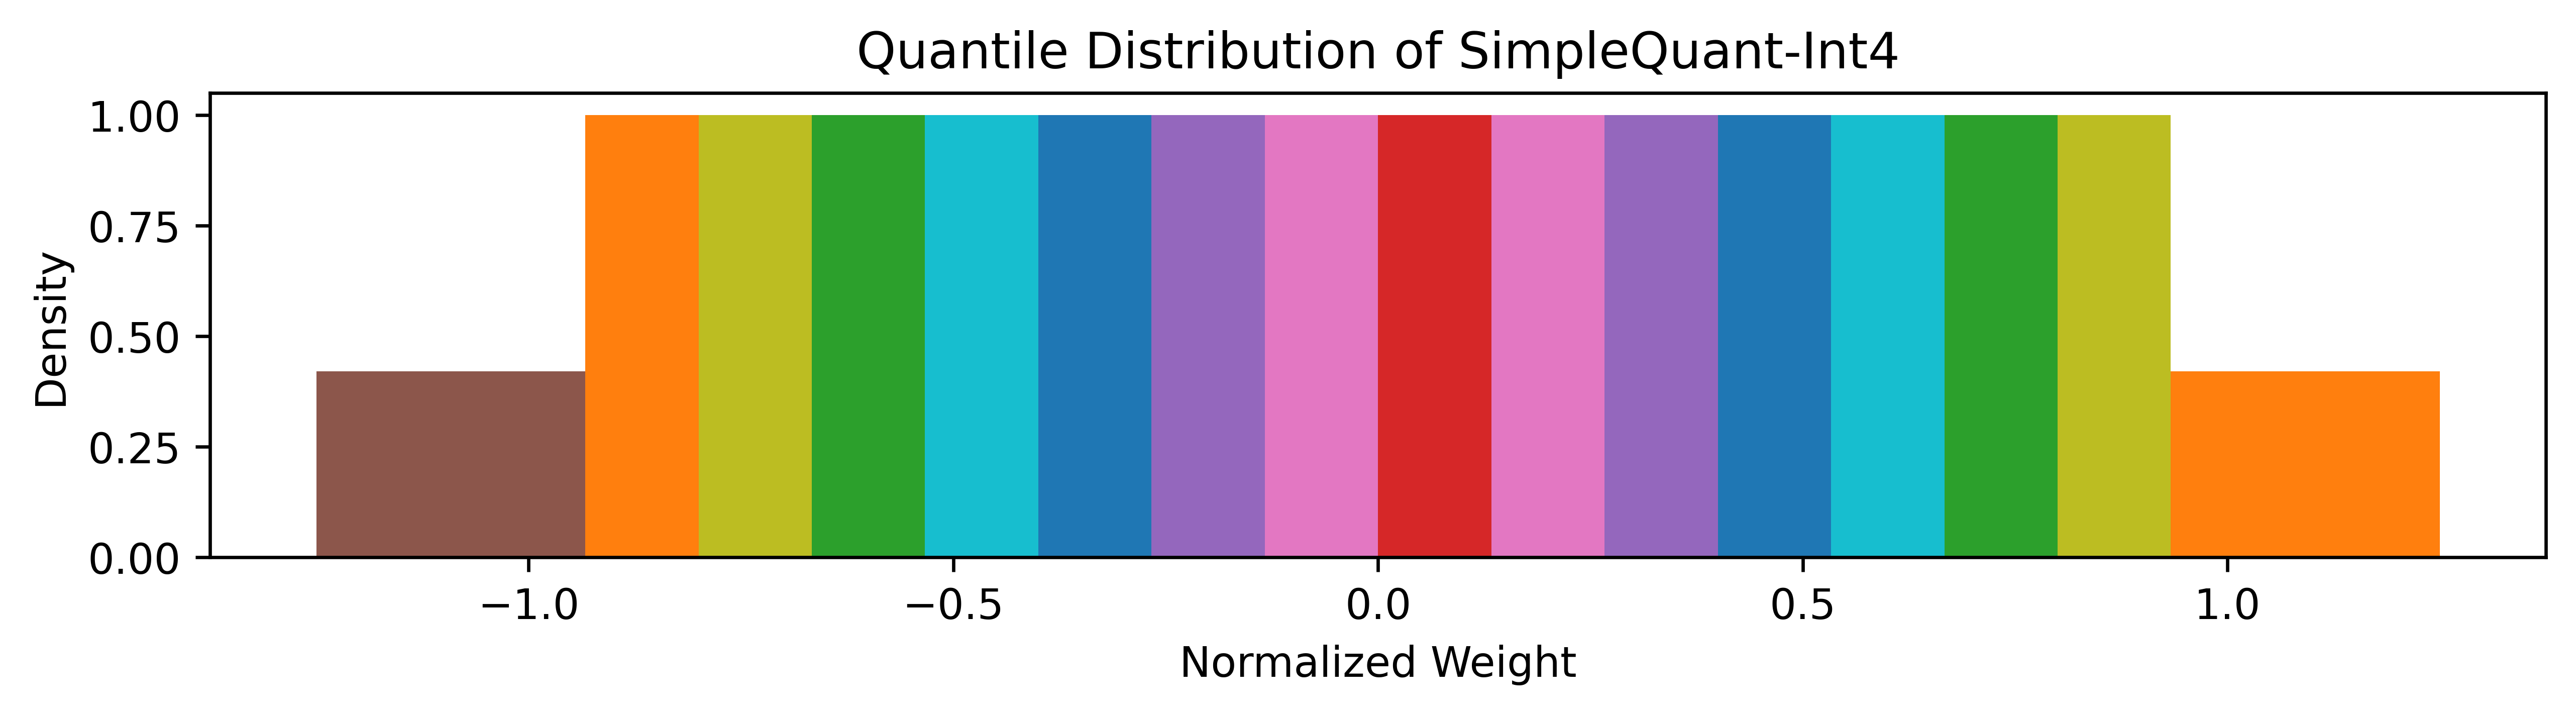

In [2]:
x = np.arange(16)
quantile = list((x - x.mean())/x.max()*2)
plot_dist("SimpleQuant-Int4", quantile)

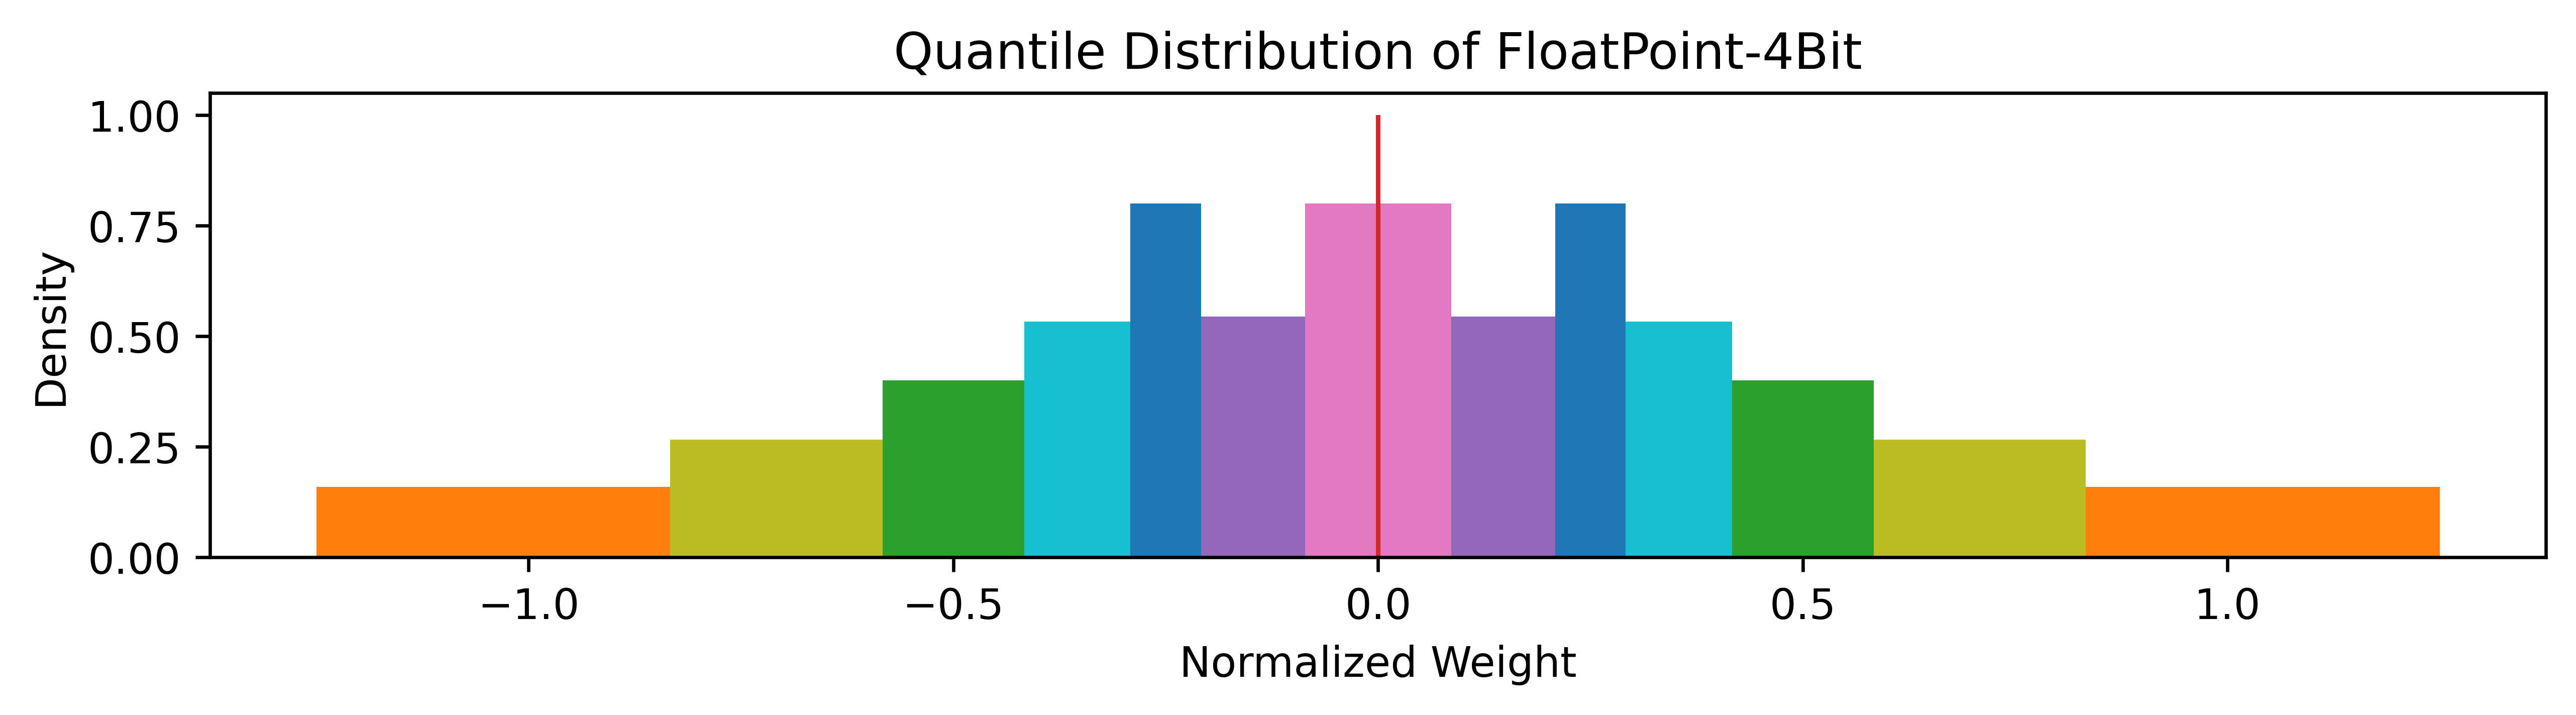

In [3]:
quantile = [-12 ,-8 ,-6 ,-4 ,-3 ,-2 ,-0.0625 ,0 ,0.0625 ,2 ,3 ,4 ,6 ,8 ,12]
plot_dist("FloatPoint-4Bit", quantile)

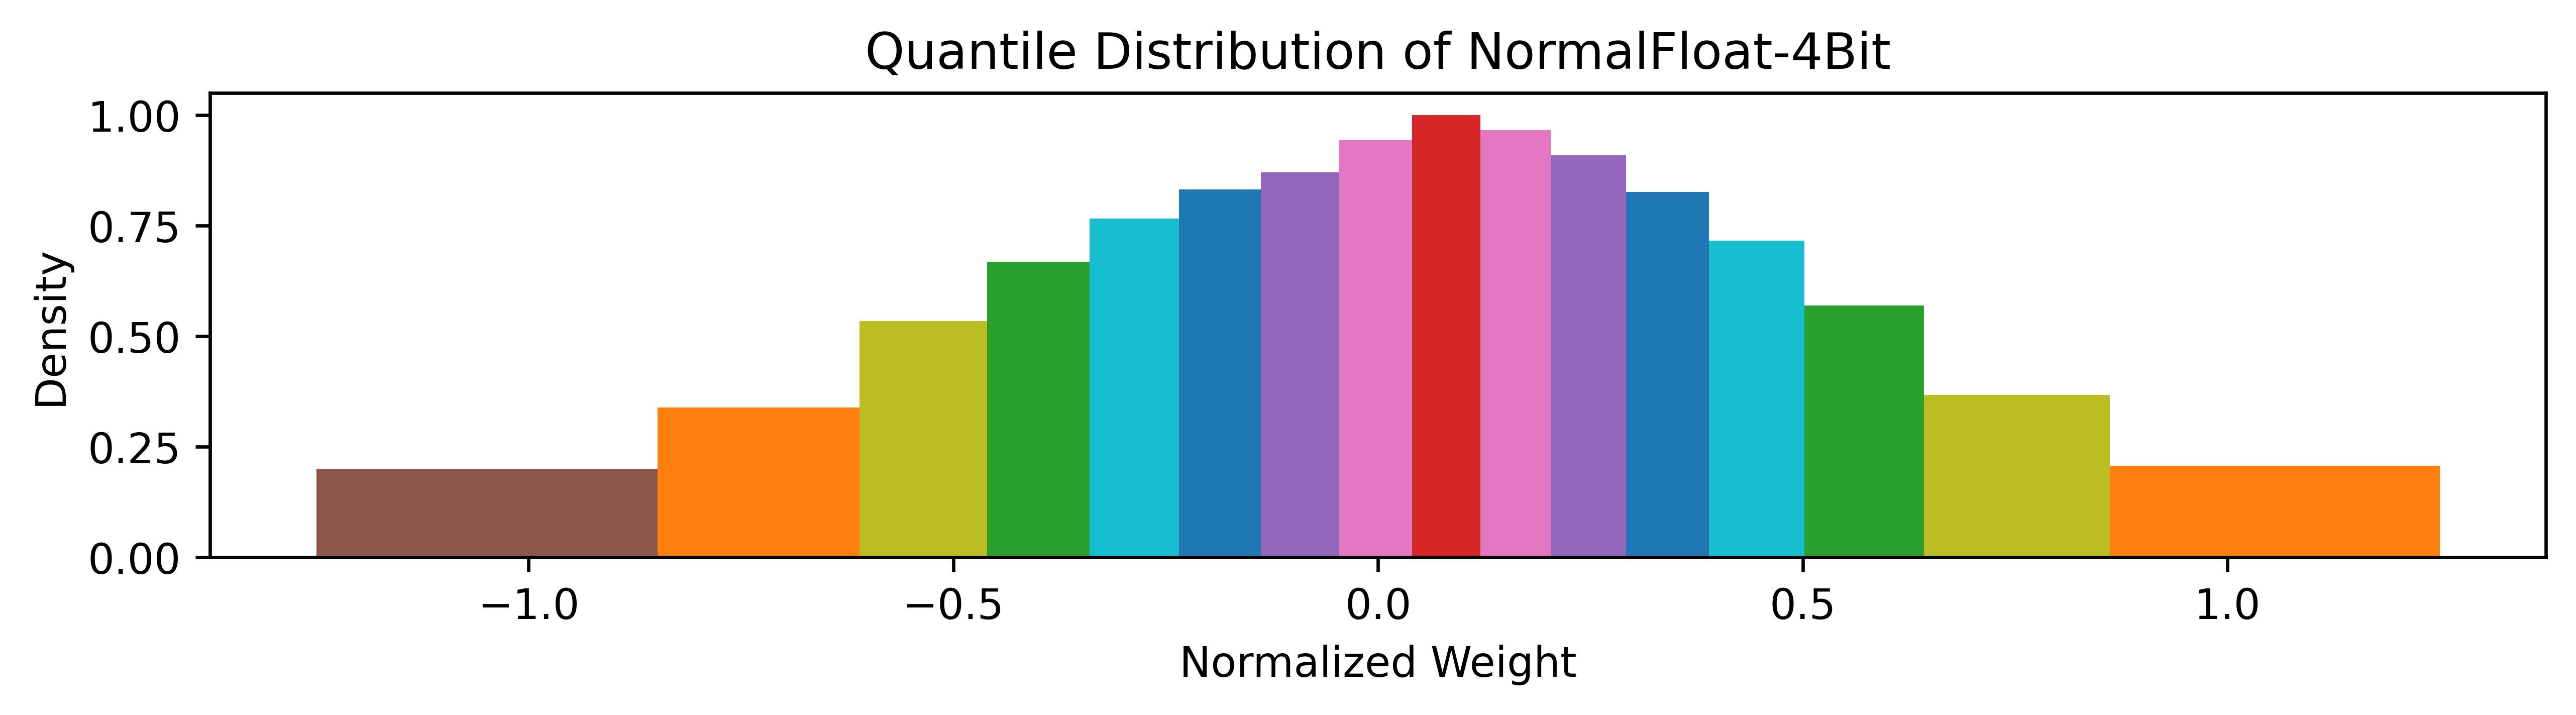

In [4]:
quantile = [ -1.0, -0.6961928009986877, -0.5250730514526367, -0.39491748809814453, -0.28444138169288635, 
     -0.18477343022823334, -0.09105003625154495, 0.0, 0.07958029955625534, 0.16093020141124725,
     0.24611230194568634, 0.33791524171829224, 0.44070982933044434, 0.5626170039176941, 0.7229568362236023, 1.0]
plot_dist("NormalFloat-4Bit", quantile)